## pandas
If you cannot remember them all, try to google "pandas cheat sheet" and print it out!

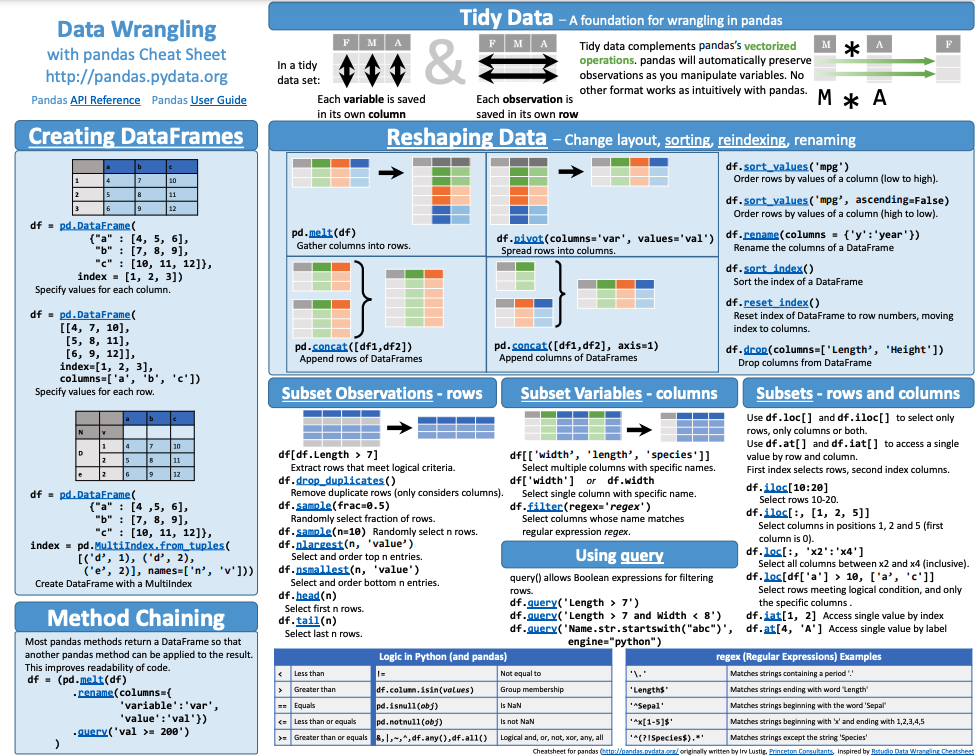

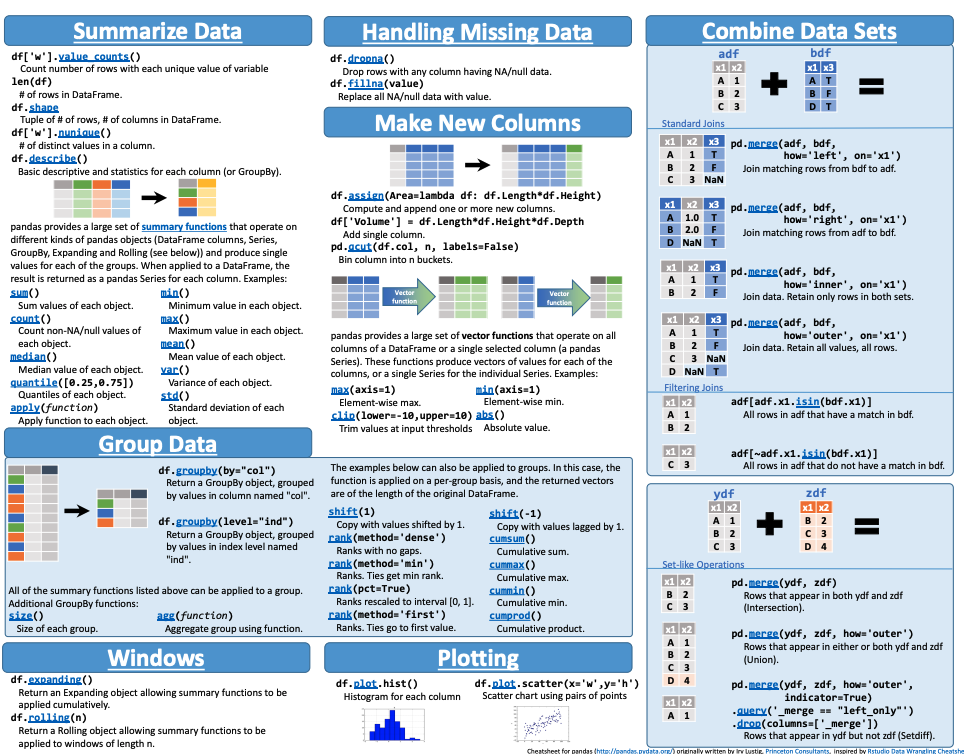

In [ ]:
import pandas as pd

### Series

In [ ]:
# Series
"""
A Series is a one-dimensional array-like object
containing an array of data (of any NumPy data type) and
an associated array of data labels, called its index.
"""

ser = pd.Series([1, 3, 5, 7])
print(type(ser))
print(ser)

<class 'pandas.core.series.Series'>
0    1
1    3
2    5
3    7
dtype: int64


In [ ]:
print(ser.values)
print(ser.index)

[1 3 5 7]
RangeIndex(start=0, stop=4, step=1)


In [ ]:
ser2 = pd.Series([1, 3, 5, 7], index = ['d', 'b', 'c', 'a'])
print(ser2)

d    1
b    3
c    5
a    7
dtype: int64


In [ ]:
print(ser2['a'])
select = ['a', 'b', 'd']
print(ser2[select]) # shadow

7
a    7
b    3
d    1
dtype: int64


In [ ]:
print(ser2[ser2 > 4])

c    5
a    7
dtype: int64


In [ ]:
print(ser2 * 2)

d     2
b     6
c    10
a    14
dtype: int64


In [ ]:
import numpy as np
print(np.exp(ser2))

d       2.718282
b      20.085537
c     148.413159
a    1096.633158
dtype: float64


In [ ]:
print('b' in ser2) # in index, not value!!!

True


In [ ]:
# From Python built-in dictionary to (labled) Series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
ser3 = pd.Series(sdata)
print(ser3)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
ser4 = pd.Series(sdata, index = states)
print(ser4)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


In [ ]:
pd.isnull(ser4) # or ser4.isnull() and try ser4.notnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
print(ser3)
print(ser4)
print(ser3 + ser4)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [ ]:
# Name, you can name (the data of) a Series and name its index
ser4.name = "population"
ser4.index.name = "states"
print(ser4)

states
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64


### DataFrame

In [ ]:
# DataFrame
"""
A DataFrame represents a tabular, spreadsheet-like data structure
containing an ordered collection of columns.
The DataFrame has both a row and column index;
it can be thought of as a dict of Series.

Row-oriented and column-oriented operations in DataFrame
are treated roughly symmetrically.
Under the hood, the data is stored as one or more two-dimensional blocks
rather than a list, dict.
"""

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


In [ ]:
df = pd.DataFrame(data, columns=['year', 'state', 'pop']) # sorted by columns
print(df)

   year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9


In [ ]:
df2 = pd.DataFrame(data,
                   columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
print(df2)

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN


In [ ]:
print(df2.year) # or df2['year']
print(df2['state']) # or df2.state

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object


In [ ]:
#print(df2.ix['two']) # ix is deprecated
print(df2.loc['two'])

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object


In [ ]:
df2.debt = 5. # try np.arange(5.)
print(df2)

       year   state  pop  debt
one    2000    Ohio  1.5   5.0
two    2001    Ohio  1.7   5.0
three  2002    Ohio  3.6   5.0
four   2001  Nevada  2.4   5.0
five   2002  Nevada  2.9   5.0


In [ ]:
ser = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
df2['debt'] = ser
print(df2)

       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7


In [ ]:
# dictionary-like
df2['eastern'] = (df2.state == 'Ohio')
print(df2)

       year   state  pop  debt  eastern
one    2000    Ohio  1.5   NaN     True
two    2001    Ohio  1.7  -1.2     True
three  2002    Ohio  3.6   NaN     True
four   2001  Nevada  2.4  -1.5    False
five   2002  Nevada  2.9  -1.7    False


In [ ]:
df3 = df2.T
print(df3)

          one   two three    four    five
year     2000  2001  2002    2001    2002
state    Ohio  Ohio  Ohio  Nevada  Nevada
pop       1.5   1.7   3.6     2.4     2.9
debt      NaN  -1.2   NaN    -1.5    -1.7
eastern  True  True  True   False   False


In [ ]:
# Index objects are immutable
print(df2.index)
try:
    df2.index[0] = "oneone"
except Exception as e:
    print(e)

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')
Index does not support mutable operations


### Reindexing

In [ ]:
ser1 = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
ser2 = ser1.reindex(['a', 'b', 'c', 'd', 'e'])
print(ser2)

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64


In [ ]:
ser1.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [ ]:
# For ordered data like time series,
# it may be desirable to do some interpolation or
# filling of values when reindexing.

ser3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
ser4 = ser3.reindex(range(6), method='ffill') # ffill: fill (or carry) values forward; bfill: backward
print(ser3)
print(ser4)

0      blue
2    purple
4    yellow
dtype: object
0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [ ]:
d = data.drop(['Colorado', 'Ohio']) # view
d

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
d = data.drop(['two', 'four'], axis = 1) # view
d

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [ ]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.loc['Colorado', ['two', 'three']] # DataFrame has no data[vala, valb], please use 'loc[]'

two      5
three    6
Name: Colorado, dtype: int64

In [ ]:
# +-*/ still work for DataFrame

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'],
                     columns = list('abd'))
print(frame)

               a         b         d
Utah   -0.515890 -0.953603 -0.068490
Ohio   -0.089538  0.952034 -0.748341
Texas   0.151479 -1.937064  0.929044
Oregon -0.982546 -0.366342  1.560831


In [ ]:
f = lambda x: x.max() - x.min() # x should be a list-like data
frame.apply(f, axis = 0)

a    1.134025
b    2.889098
d    2.309172
dtype: float64

In [ ]:
help(pd.DataFrame.apply) # see pd.DataFrame.apply and pd.DataFrame.applymap

Help on function apply in module pandas.core.frame:

apply(self, func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None, args=(), **kwargs)
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    
    raw : bool, default False
        Determines if row or column

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'],
                     columns = list('cda'))
frame.sort_index()

,c,d,a
Ohio,-0.729724,0.428857,-1.182577
Oregon,0.963294,3.387850,-0.986714
Texas,-0.793042,1.607891,0.433200
Utah,-1.866404,0.633745,0.483559


In [ ]:
frame.sort_index(axis=1)

,a,c,d
Utah,0.483559,-1.866404,0.633745
Ohio,-1.182577,-0.729724,0.428857
Texas,0.433200,-0.793042,1.607891
Oregon,-0.986714,0.963294,3.387850


In [ ]:
frame.sort_index(axis=1, ascending=False)

,d,c,a
Utah,0.633745,-1.866404,0.483559
Ohio,0.428857,-0.729724,-1.182577
Texas,1.607891,-0.793042,0.433200
Oregon,3.387850,0.963294,-0.986714


### Summarizing and Computing Descriptive Statistics

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])

print(df)

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [ ]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [ ]:
# On non-numeric data,
# describe() produces alternate summary statistics
s = pd.Series(['a', 'a', 'b', 'c'] * 4)
s.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Yahoo Finance

In [ ]:
import yfinance as yf
import datetime

In [ ]:
start = datetime.datetime(2017, 4, 1)
end = datetime.datetime(2018, 4, 13)

f = yf.download('GE', start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(type(f)) # like in heaven
print(f.head())

<class 'pandas.core.frame.DataFrame'>
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-04-03  178.706543  180.147720  178.646484  179.427124  166.846970   
2017-04-04  179.547226  180.688171  178.346237  180.267822  167.628723   
2017-04-05  180.688171  182.669785  179.847473  179.967575  167.349487   
2017-04-06  180.147720  181.228607  179.667328  179.727371  167.126175   
2017-04-07  179.667328  181.288651  179.667328  180.087677  167.461212   

             Volume  
Date                 
2017-04-03  4981295  
2017-04-04  4172776  
2017-04-05  4302719  
2017-04-06  3588721  
2017-04-07  3160023  


### Correlation and Covariance

In [ ]:
# I want to know the replationship between several companies, ['AAPL', 'IBM', 'MSFT', 'GOOG'].
companies = ['AAPL', 'IBM', 'MSFT', 'GOOG']

# I need a 2D table, so using DataFrame and dictionary might be a good idea.
# {'AAPL': [value1, v2, v3, ...], 'IBM': [v1, v2, v3, ...], ...}
stock_data_dict = dict()

In [ ]:
# Take a look at the API, help(web) or help(pandas_datareader.data)

# collect all data first
for com in companies:
    stock_data_dict[com] = yf.download([com], start, end)

for key in stock_data_dict:
    print(key, type(stock_data_dict[key]))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AAPL <class 'pandas.core.frame.DataFrame'>
IBM <class 'pandas.core.frame.DataFrame'>
MSFT <class 'pandas.core.frame.DataFrame'>
GOOG <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Two DataFrames. Select interesting columns, i.e., 'Volume' and 'Close'.
close = pd.DataFrame({k: stock_data_dict[k]["Close"].tolist() for k in stock_data_dict})
volume = pd.DataFrame({k: stock_data_dict[k]["Volume"].tolist() for k in stock_data_dict})

In [ ]:
print(close.head())

        AAPL         IBM       MSFT       GOOG
0  35.924999  166.826004  65.550003  41.927502
1  36.192501  166.845123  65.730003  41.728500
2  36.005001  165.277252  65.559998  41.570499
3  35.915001  164.866150  65.730003  41.394001
4  35.834999  164.569794  65.680000  41.233501


In [ ]:
print(volume.head())

        AAPL      IBM      MSFT      GOOG
0   79942800  4483679  20400900  33430000
1   79565600  3251909  12997400  20908000
2  110871600  6525889  21448600  31106000
3   84596000  3593428  18103500  25088000
4   66688800  3753362  14108500  21146000


In [ ]:
"""
Series.pct_change(periods=1, fill_method='pad', limit=None, freq=None)
Percent change over given number of periods.
"""

ptcClose = close.pct_change()
ptcClose.tail()

,AAPL,IBM,MSFT,GOOG
254,-0.025579,-0.022463,-0.023273,-0.020208
255,0.009918,0.014080,0.005985,0.008351
256,0.018818,0.017683,0.023246,0.015944
257,-0.004675,-0.000193,-0.010982,-0.011312
258,0.009858,0.017443,0.018724,0.012294


In [ ]:
# Find the relation between IBM and MSFT
# Do they have 'similar' ptc?

print(ptcClose.AAPL.corr(ptcClose.IBM))
print(pd.Series.corr(ptcClose.AAPL, ptcClose.IBM))

0.2571646753687434
0.2571646753687434


In [ ]:
print(ptcClose.AAPL.cov(ptcClose.IBM))

4.139838678562972e-05


In [ ]:
# DataFrame's version returns all
ptcClose.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.257165,0.660621,0.647423
IBM,0.257165,1.000000,0.405206,0.380354
MSFT,0.660621,0.405206,1.000000,0.780001
GOOG,0.647423,0.380354,0.780001,1.000000


In [ ]:
ptcClose.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000172,0.000041,0.000117,0.000113
IBM,0.000041,0.000151,0.000067,0.000062
MSFT,0.000117,0.000067,0.000182,0.000141
GOOG,0.000113,0.000062,0.000141,0.000178


In [ ]:
ptcClose.corrwith(ptcClose.IBM) # another way

AAPL    0.257165
IBM     1.000000
MSFT    0.405206
GOOG    0.380354
dtype: float64

In [ ]:
# Passing a DataFrame computes the correlations of matching column names.
ptcClose.corrwith(volume)

AAPL   -0.102883
IBM     0.052248
MSFT    0.034033
GOOG   -0.213852
dtype: float64

### Count Data

In [ ]:
df = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                'Qu2': [2, 3, 1, 2, 3],
                'Qu3': [1, 5, 2, 4, 4]})
print(df)

   Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4


In [ ]:
# I want to know how many 1s, 2s, ... in each column.
rdf = df.apply(pd.value_counts)
#rdf = rdf.fillna(0)
print(rdf)

   Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  NaN  2.0  1.0
3  2.0  2.0  NaN
4  2.0  NaN  2.0
5  NaN  NaN  1.0


### Handling Missing Data

In [ ]:
from numpy import nan as NaN

s_data = pd.Series(['aardvark', 'artichoke', NaN, 'avocado'])
s_data.isnull() # notnull()

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
print(s_data.dropna())

0     aardvark
1    artichoke
3      avocado
dtype: object


In [ ]:
print(s_data.fillna('N/A'))

0     aardvark
1    artichoke
2          N/A
3      avocado
dtype: object


In [ ]:
# DataFrame version has reachful args.

import numpy.random
s = pd.Series(numpy.random.randn(21))
s[s < 0] = NaN
s = s.values.reshape(7,3)
df = pd.DataFrame(s)
print(df)

          0         1         2
0  1.013028       NaN  1.208348
1       NaN  0.846030  1.748642
2  0.106663       NaN  0.094965
3       NaN  0.157206       NaN
4       NaN       NaN       NaN
5       NaN  1.056057  0.100311
6  0.066366  0.319091  0.945962


In [ ]:
df = pd.DataFrame(numpy.random.randn(7,3))
df = df.apply(lambda s: [i if i > 0 else NaN for i in s])
df

,0,1,2
0,0.092034,0.038361,NaN
1,2.080208,NaN,0.466600
2,0.116530,0.725602,NaN
3,NaN,NaN,NaN
4,NaN,0.276125,NaN
5,NaN,0.651304,0.221868
6,0.508049,0.946038,NaN


In [ ]:
df.fillna({0: -0.5, 1: -1}) # try fillna(0, inplace=True)

,0,1,2
0,0.092034,0.038361,NaN
1,2.080208,-1.000000,0.466600
2,0.116530,0.725602,NaN
3,-0.500000,-1.000000,NaN
4,-0.500000,0.276125,NaN
5,-0.500000,0.651304,0.221868
6,0.508049,0.946038,NaN


In [ ]:
df.fillna(method='ffill') # method : {'backfill', 'bfill', 'pad', 'ffill', None}

,0,1,2
0,0.092034,0.038361,NaN
1,2.080208,0.038361,0.466600
2,0.116530,0.725602,0.466600
3,0.116530,0.725602,0.466600
4,0.116530,0.276125,0.466600
5,0.116530,0.651304,0.221868
6,0.508049,0.946038,0.221868


In [ ]:
print(df.mean())
print(df.fillna(df.mean()))

0    0.699205
1    0.527486
2    0.344234
dtype: float64
          0         1         2
0  0.092034  0.038361  0.344234
1  2.080208  0.527486  0.466600
2  0.116530  0.725602  0.344234
3  0.699205  0.527486  0.344234
4  0.699205  0.276125  0.344234
5  0.699205  0.651304  0.221868
6  0.508049  0.946038  0.344234


### High Dimensional Indexing, Hierarchical Indexing

In [ ]:
import numpy.random

data = pd.Series(numpy.random.randn(10),
              index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
print(data)
print(data.index)

a  1   -1.536371
   2    0.760410
   3   -0.563570
b  1    1.229884
   2    1.880779
   3   -0.278575
c  1   -1.611389
   2   -1.356092
d  2   -0.141911
   3   -1.714813
dtype: float64
MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )


In [ ]:
data['b'] # Note that data is a Series

1    1.229884
2    1.880779
3   -0.278575
dtype: float64

In [ ]:
data['b':'c']

b  1    1.229884
   2    1.880779
   3   -0.278575
c  1   -1.611389
   2   -1.356092
dtype: float64

In [ ]:
data[:, 2] # there is a ','

a    0.760410
b    1.880779
c   -1.356092
d   -0.141911
dtype: float64

In [ ]:
# Since Series is conceptually 1D,
# we can unstack() it to DataFrame
# Question: what is the differenc bewteen multi-indexed 1D data and 2D data?

data.unstack()

,1,2,3
a,-1.536371,0.760410,-0.563570
b,1.229884,1.880779,-0.278575
c,-1.611389,-1.356092,NaN
d,NaN,-0.141911,-1.714813


In [ ]:
data.unstack().stack() # NaN will be ignored.

a  1   -1.536371
   2    0.760410
   3   -0.563570
b  1    1.229884
   2    1.880779
   3   -0.278575
c  1   -1.611389
   2   -1.356092
d  2   -0.141911
   3   -1.714813
dtype: float64

In [ ]:
import numpy

frame = pd.DataFrame(numpy.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
frame.sum()

state     color
Ohio      Green    18
          Red      22
Colorado  Green    26
dtype: int64

### Move column to index

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [ ]:
frame.set_index(['c','d'], drop=True) # Try drop=False

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [ ]:
frame.reset_index() # move the hierarchical index levels to column

,index,a,b,c,d
0,0,0,7,one,0
1,1,1,6,one,1
2,2,2,5,one,2
3,3,3,4,two,0
4,4,4,3,two,1
5,5,5,2,two,2
6,6,6,1,two,3
